In [285]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

Populating the interactive namespace from numpy and matplotlib


### Monty Hall Problem

Author: Hariz Mohd Rani Hisham

In [431]:
def prize_door():
    state = np.random.random()
    door = None
    if state <= 0.3333:
        door = 1
        return door
    elif (0.3333 < state) & (state <= 0.6667):
        door = 2
        return door
    else:
        door = 3
        return door

def player_choice():
    return prize_door()

In [434]:
def open_door(prize, choice):
    show = np.random.random()
    ls = [1,2,3]
    if prize == choice:
        ls.remove(prize)
        return random.choice(ls)
    elif show > 0.5:
        return None
    else:
        ls.remove(prize)
        ls.remove(choice)
        return ls[0]

In [435]:
df = pd.DataFrame(columns = ['prize','choice','shown','vegas_win','smart_win'])

N = 100

lprize = []
lchoice = []
lshow = []

for i in range(N):
    lprize.append(prize_door())
    lchoice.append(player_choice())
    
df['prize'] = lprize
df['choice'] = lchoice

for i in range(N):
    lshow.append(open_door(df['prize'][i], df['choice'][i]))
    
df['shown'] = lshow    

__Q1 Simulating player strategies__

Player strategy simulations are broken down into two strategies:
1. __The stay strategy:__ In this notebook, we'll call it "Vegas", mainly for the fact that most people who gamble in Las Vegas tend to believe in superstition and the power of luck when making bets. This strategy assumes the player will __always stick to their initial door__. Given that there are 3 doors to choose from, the probability of the player making the right choice and not switching is 1/3 or 0.3333.
2. __The switch strategy:__ Here, we'll call it the "Smart" strategy. In this strategy, we assume that the player will __always switch__ doors. This also assumes that the probability of a player winning after switching doors is 2/3 or 0.6667.

__First, the Vegas strategy:__

In [ ]:
def vegas_strategy(N = 1000, switch = 0):
    p = 0.3333  # Probability of player choosing winning door
    switch = switch  # Probability of player changing strategies
    win_count = 0
    loss_count = 0
    record = []
    for i in range(N):
        if switch:
            p = 0.6667
        x = (np.random.random() < p)
        if x:
            win_count += 1
            record.append((i + 1, win_count, loss_count))
        else:
            loss_count += 1
            record.append((i + 1, win_count, loss_count))
    return record

In [198]:
vegas = pd.DataFrame(vegas_strategy(N = 100),
                     columns = ['game', 'win_count', 'loss_count'])
vegas['win_freq'] = vegas['win_count'] / vegas['game']

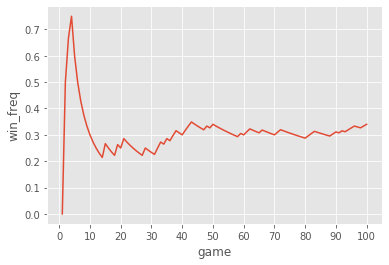

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = sns.lineplot(x = 'game', y = 'win_freq', data = vegas)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

For 100 games simulated, we can see that the player's win frequency with the stay strategy converges to around 0.3333, as we expected.

__The Smart strategy:__

In [ ]:
def smart_strategy(N = 1000, switch = 1):
    p = 0.3333  # Probability of player choosing winning door
    switch = switch  # Probability of player changing doors
    win_count = 0
    loss_count = 0
    record = []
    for i in range(N):
        if switch:
            p = 0.6667
        x = (np.random.random() < p)
        if x:
            win_count += 1
            record.append((i + 1, win_count, loss_count))
        else:
            loss_count += 1
            record.append((i + 1, win_count, loss_count))
    return record

In [187]:
smart = pd.DataFrame(smart_strategy(N = 100), columns = ['game', 'win_count', 'loss_count'])
smart['win_freq'] = smart['win_count'] / smart['game']

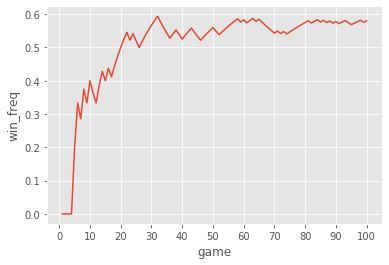

In [190]:
bx = sns.lineplot(x = 'game', y = 'win_freq', data = smart)
bx.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

After simulating 100 games, we can observe that the player's win frequency converges to 0.6667 or 2/3 with the switch strategy.

__Q2 Simulating the Game__

With some modifications to the initial "Vegas" and "Smart" strategies, we can include the assumed 13% probability that a player will employ a switch strategy in any given game.

In [386]:
def vegas_strategy(switch, i, win_count, loss_count):
    p = 0.3333  # Probability of player choosing winning door
    switch = switch  # Probability of player changing strategies
    if switch:
        p = 0.6667
    x = (np.random.random() <= p)
    if x:
        i += 1
        win_count = 1
        return i, win_count, loss_count, 'stay'
    else:
        i += 1
        loss_count = 1
        return i, win_count, loss_count, 'stay'

def smart_strategy(switch, i, win_count, loss_count):
    p = 0.3333  # Probability of player choosing winning door
    switch = switch  # Probability of player changing doors
    if switch:
        p = 0.6667
    x = (np.random.random() <= p)
    if x:
        i += 1
        win_count = 1
        return i, win_count, loss_count, 'switch'
    else:
        i += 1
        loss_count = 1
        return i, win_count, loss_count, 'switch'

In [401]:
def game(N = 100):
    I = [-1000000]  # Initial investment
    E = 100000  # Weekly production expense
    C = 50000  # Cost of each car
    R = 7/0.5 * 10000  # Weekly ad revenue
    
    record = []
    p = 0.13  # Probability of player switching doors
    win_count = 0
    loss_count = 0
    for i in range(N):
        switch = 0
        if (np.random.random() <= p):
            switch = 1
            record.append(smart_strategy(switch, i, win_count, loss_count))
        else:
            record.append(vegas_strategy(switch, i, win_count, loss_count))
    record = [record[i] + (I[i],) for i in range(len(record))]
    return pd.DataFrame(record, columns = ['games', 'win_count', 'loss_count', 'strategy'])

In [413]:
def profits(outcome, revenue, expense, car = 0):
    profit = 0
    if outcome:
        profit = revenue - expense - car
        return profit
    else:
        profit = revenue - expense
        return profit
    
def game(N = 100):
    I = [-1000000]  # Initial investment
    E = 100000  # Weekly production expense
    C = 50000  # Cost of each car
    R = 7/0.5 * 10000  # Weekly ad revenue
    
    record = []
    p = 0.13  # Probability of player switching doors
    win_count = 0
    loss_count = 0
    for i in range(N):
        switch = 0
        if (np.random.random() <= p):
            switch = 1
            record.append(smart_strategy(switch, i, win_count, loss_count))
            if record[-1][1]:
                P = profits(record[-1][1], R, E, C)
                I += [I[-1] + P]
            else:
                P = profits(record[-1][2], R, E)
                I += [I[-1] + P]
        else:
            record.append(vegas_strategy(switch, i, win_count, loss_count))
            if record[-1][1]:
                P = profits(record[-1][1], R, E, C)
                I += [I[-1] + P]
            else:
                P = profits(record[-1][2], R, E)
                I += [I[-1] + P]
    record = [record[i] + (I[i],) for i in range(len(record))]
    return pd.DataFrame(record, columns = ['games', 'win_count', 'loss_count', 'strategy', 'net_profit'])

In [416]:
def main():
    df = game()
    df['win_record'] = df['win_count'].cumsum()
    df['loss_record'] = df['loss_count'].cumsum()
    df['win_freq'] = df['win_record'] / df['games']
    df['house_wins'] = 1 - df['win_freq']

    ax = sns.lineplot(x = 'games', y = 'net_profit', data = df)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

    print(df.tail(15))
    plt.show()

    games  win_count  loss_count strategy  net_profit  win_record  \
85     86          0           1   switch    850000.0          31   
86     87          1           0     stay    890000.0          32   
87     88          1           0     stay    880000.0          33   
88     89          0           1     stay    870000.0          33   
89     90          1           0   switch    910000.0          34   
90     91          0           1     stay    900000.0          34   
91     92          0           1     stay    940000.0          34   
92     93          1           0   switch    980000.0          35   
93     94          0           1     stay    970000.0          35   
94     95          1           0     stay   1010000.0          36   
95     96          0           1     stay   1000000.0          36   
96     97          0           1     stay   1040000.0          36   
97     98          1           0     stay   1080000.0          37   
98     99          1           0  

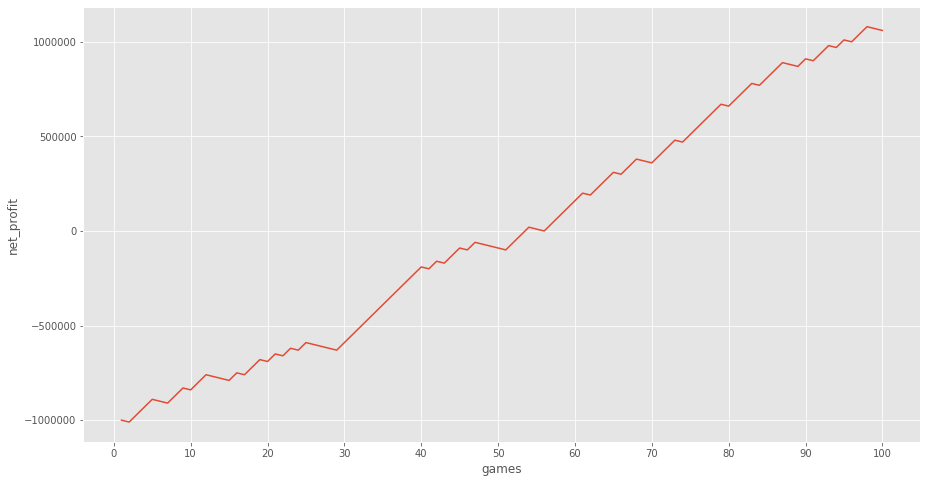

In [417]:
if __name__ == '__main__':
    main()

So with our assumptions that 13% of players will switch doors as well as the fact that the studio has made a $1 million dollar investment in this show, it looks like we'll only breakeven after about a year of production. Not very good by 1970's consevative businesses standards.

Well, what can we do?

Recall that players know two things:
1. The probability of a player choosing the right door on the first try is 1/3. When offered the switch, that probability bumps up to 2/3 chance of winning.
2. The host knows where the car is and will never open the door with the car. He will always open the door with the goat.

How can we take advantage of these assumptions to make it harder for the player to win the car? (and take home a goat instead).

__Q3 Making things harder__

We'll adjust the code to add an additional door. We can do this by changing the player's probability of getting it right on the first try from 1/3 to 1/4.

In [445]:
def vegas_strategy(switch, i, win_count, loss_count):
    p = 0.25  # Probability of player choosing winning door
    switch = switch  # Probability of player changing strategies
    if switch:
        p = 0.25  # Probability of winning on second try
    x = (np.random.random() <= p)
    if x:
        i += 1
        win_count = 1
        return i, win_count, loss_count, 'stay'
    else:
        i += 1
        loss_count = 1
        return i, win_count, loss_count, 'stay'

def smart_strategy(switch, i, win_count, loss_count):
    p = 0.25  # Probability of player choosing winning door
    switch = switch  # Probability of player changing doors
    if switch:
        p = 0.25  # Probability of winning on second try
    x = (np.random.random() <= p)
    if x:
        i += 1
        win_count = 1
        return i, win_count, loss_count, 'switch'
    else:
        i += 1
        loss_count = 1
        return i, win_count, loss_count, 'switch'

In [446]:
def profits(outcome, revenue, expense, car = 0):
    profit = 0
    if outcome:
        profit = revenue - expense - car
        return profit
    else:
        profit = revenue - expense
        return profit
    
def game(N = 100):
    I = [-1000000]  # Initial investment
    E = 100000  # Weekly production expense
    C = 50000  # Cost of each car
    R = 7/0.5 * 10000  # Weekly ad revenue
    
    record = []
    p = 0.13  # Probability of player switching doors
    win_count = 0
    loss_count = 0
    for i in range(N):
        switch = 0
        if (np.random.random() <= p):
            switch = 1
            record.append(smart_strategy(switch, i, win_count, loss_count))
            if record[-1][1]:
                P = profits(record[-1][1], R, E, C)
                I += [I[-1] + P]
            else:
                P = profits(record[-1][2], R, E)
                I += [I[-1] + P]
        else:
            record.append(vegas_strategy(switch, i, win_count, loss_count))
            if record[-1][1]:
                P = profits(record[-1][1], R, E, C)
                I += [I[-1] + P]
            else:
                P = profits(record[-1][2], R, E)
                I += [I[-1] + P]
    record = [record[i] + (I[i],) for i in range(len(record))]
    return pd.DataFrame(record, columns = ['games', 'win_count', 'loss_count', 'strategy', 'net_profit'])

In [447]:
def main():
    df = game()
    df['win_record'] = df['win_count'].cumsum()
    df['loss_record'] = df['loss_count'].cumsum()
    df['win_freq'] = df['win_record'] / df['games']
    df['house_wins'] = 1 - df['win_freq']

    ax = sns.lineplot(x = 'games', y = 'net_profit', data = df)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

    print(df.tail(15))
    plt.show()

    games  win_count  loss_count strategy  net_profit  win_record  \
85     86          0           1     stay   1500000.0          18   
86     87          0           1     stay   1540000.0          18   
87     88          0           1     stay   1580000.0          18   
88     89          1           0     stay   1620000.0          19   
89     90          0           1     stay   1610000.0          19   
90     91          0           1   switch   1650000.0          19   
91     92          1           0   switch   1690000.0          20   
92     93          0           1     stay   1680000.0          20   
93     94          0           1     stay   1720000.0          20   
94     95          0           1     stay   1760000.0          20   
95     96          0           1     stay   1800000.0          20   
96     97          0           1     stay   1840000.0          20   
97     98          0           1     stay   1880000.0          20   
98     99          1           0  

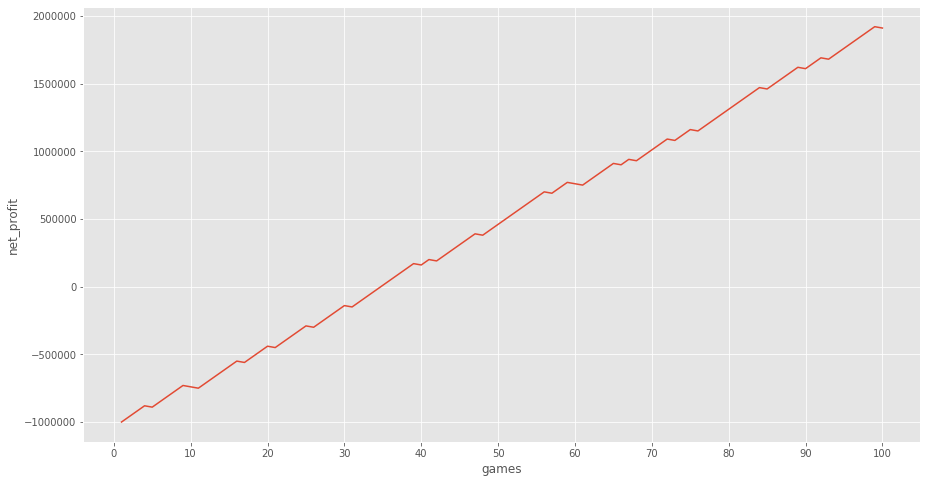

In [449]:
if __name__ == '__main__':
    main()

By adding an additional door, the probability of the player getting it right the first time decreased to 0.25 or 1/4. After revealing the door and choosing the switch, the probability of the player getting the second guess right is 0.75 * 0.3333, or roughly 0.25.

Adjusting for this, we see that the show breakseven ~15 weeks earlier than before, with an even higher net profit after a 2 year run.

__Conclusion__

Monty Hall is hard, perplexing, even mystical sometimes. It challenges our human intuition to trust our gut in high stakes situations and instead rely on simulated numbers to win. But let's be real, winning a car isn't all that great - you end up spending more down the road on maintenance and taxes.

Instead, let's take a moment to appreciate the beauty of the math behind Monty Hall and how it has informed us of the common fallacies our simpleton brains come across when dealing with statistics.